In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# Data Exploration

In [2]:
#merging all crime dataset

# Path to my folder of datasets
folder_path = "/Users/deen/Desktop/my course work/merging" 

# Get list of all CSV files
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and concatenate all into one DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
data=pd.DataFrame(df)

# Preview the combined dataset
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,efa342b41714d3957433367c852d7abb3b5c487ee34b07...,2023-06,West Yorkshire Police,West Yorkshire Police,-1.459649,53.605743,On or near Bleakley Lane,E01007438,Barnsley 001C,Other crime,Further investigation is not in the public int...,NaN
1,affb157f7eea118c7528c05ad01687bcba2ac126f2753d...,2023-06,West Yorkshire Police,West Yorkshire Police,-1.459649,53.605743,On or near Bleakley Lane,E01007438,Barnsley 001C,Other crime,Further investigation is not in the public int...,NaN
2,NaN,2023-06,West Yorkshire Police,West Yorkshire Police,-1.878497,53.944130,On or near Saw Mill Lane,E01010646,Bradford 001A,Anti-social behaviour,NaN,NaN
3,bb784dee1064a12422fc53db486ed363de8d8c54ab018c...,2023-06,West Yorkshire Police,West Yorkshire Police,-1.868104,53.935428,On or near Lumb Gill Lane,E01010646,Bradford 001A,Burglary,Investigation complete; no suspect identified,NaN
4,d10deb17fb47b01a23e9128963ea93610af9206154f0ab...,2023-06,West Yorkshire Police,West Yorkshire Police,-1.875632,53.944325,On or near Wharfe Park,E01010646,Bradford 001A,Other theft,Investigation complete; no suspect identified,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937853 entries, 0 to 1937852
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 177.4+ MB


# Data preprocessing and Data Cleaning

In [4]:
#picking important features
columns=data[['Crime ID','Month','Location', 'Longitude','Latitude','LSOA code','LSOA name','Crime type']]
is_bradford=columns['LSOA name'].str.startswith('Bradford',na=False)
Analysis_data=columns[is_bradford]
Analysis_data=Analysis_data.sort_values(by='Month')
Analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471912 entries, 823885 to 718319
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Crime ID    418376 non-null  object 
 1   Month       471912 non-null  object 
 2   Location    471912 non-null  object 
 3   Longitude   471912 non-null  float64
 4   Latitude    471912 non-null  float64
 5   LSOA code   471912 non-null  object 
 6   LSOA name   471912 non-null  object 
 7   Crime type  471912 non-null  object 
dtypes: float64(2), object(6)
memory usage: 32.4+ MB


In [5]:
#Checking for missing values
Analysis_data.isna().sum()

Crime ID      53536
Month             0
Location          0
Longitude         0
Latitude          0
LSOA code         0
LSOA name         0
Crime type        0
dtype: int64

In [6]:
#Removing missing values
Analysis_data=Analysis_data.dropna()
Analysis_data.isna().sum()

Crime ID      0
Month         0
Location      0
Longitude     0
Latitude      0
LSOA code     0
LSOA name     0
Crime type    0
dtype: int64

In [7]:
#checking unique values
Analysis_data.nunique()

Crime ID      418366
Month             71
Location        7254
Longitude      14549
Latitude       14296
LSOA code        314
LSOA name        330
Crime type        13
dtype: int64

# Data preprocessing

In [8]:
Analysis_data=Analysis_data.copy()
Analysis_data['Month'] = pd.to_datetime(Analysis_data['Month'],format='%Y-%m')

# Create additional time-based features
Analysis_data['Year'] = Analysis_data['Month'].dt.year
Analysis_data['MonthNum'] = Analysis_data['Month'].dt.month
Analysis_data['MonthName'] = Analysis_data['Month'].dt.strftime('%B')
Analysis_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 418376 entries, 821794 to 718319
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Crime ID    418376 non-null  object        
 1   Month       418376 non-null  datetime64[ns]
 2   Location    418376 non-null  object        
 3   Longitude   418376 non-null  float64       
 4   Latitude    418376 non-null  float64       
 5   LSOA code   418376 non-null  object        
 6   LSOA name   418376 non-null  object        
 7   Crime type  418376 non-null  object        
 8   Year        418376 non-null  int32         
 9   MonthNum    418376 non-null  int32         
 10  MonthName   418376 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 35.1+ MB


In [9]:
Analysis_data

,Crime ID,Month,Location,Longitude,Latitude,LSOA code,LSOA name,Crime type,Year,MonthNum,MonthName
821794,bb45609353f93ce806f35a48e9bd13ff81163252bc4bc2...,2019-01-01,On or near Botany Avenue,-1.748126,53.815985,E01010600,Bradford 028D,Violence and sexual offences,2019,1,January
821795,40dbd8ffd0a2c41a63454bfe51efd9877245079cc0f719...,2019-01-01,On or near Whiteways,-1.751805,53.812766,E01010600,Bradford 028D,Violence and sexual offences,2019,1,January
821796,d72c6ae23eae90a472712a3cd31873f88c26cccc1589dd...,2019-01-01,On or near Whiteways,-1.751805,53.812766,E01010600,Bradford 028D,Violence and sexual offences,2019,1,January
821797,da3ed8ca835fc75486dc1751b515ff2bb6388c7645c57c...,2019-01-01,On or near Whiteways,-1.751805,53.812766,E01010600,Bradford 028D,Violence and sexual offences,2019,1,January
821798,f7503672ec58475ff7d859b7788da34566a77ac5225777...,2019-01-01,On or near Wyndham Avenue,-1.749942,53.814524,E01010600,Bradford 028D,Other crime,2019,1,January
...,...,...,...,...,...,...,...,...,...,...,...
719191,116da8b916e12ec099ead3a1b44af8c396f79d8fa3bf8e...,2024-12-01,On or near Bevan Court,-1.795878,53.778515,E01010665,Bradford 050B,Public order,2024,12,December
719192,f0947187530e4ae97a73a08d0bf89110f51201dc249d4a...,2024-12-01,On or near Supermarket,-1.788642,53.780965,E01010665,Bradford 050B,Shoplifting,2024,12,December
719193,bec3ba48503b84151741cca2ab391536c9c378b8a215b4...,2024-12-01,On or near Supermarket,-1.788642,53.780965,E01010665,Bradford 050B,Shoplifting,2024,12,December
719195,fb763545cd62cd7f0944d4ee86b7d79b1abb35350d9630...,2024-12-01,On or near Royal Close,-1.794120,53.777946,E01010665,Bradford 050B,Theft from the person,2024,12,December


# Descriptive analysis

In [10]:
#filtering for one crime
main_crime=Analysis_data[Analysis_data['Crime type']=='Violence and sexual offences']
#yearly crime
yearly_crime=main_crime.groupby('Year').size().reset_index(name='Total crimes')
yearly_crime=yearly_crime.set_index('Year')
print(f'{yearly_crime} \n\nThe total crime accross all years is: {yearly_crime["Total crimes"].sum()}')


      Total crimes
Year              
2019         29778
2020         30241
2021         33854
2022         33108
2023         34817
2024         32370 

The total crime accross all years is: 194168


In [11]:
# total monthly crimes across all years
monthly_crimes=main_crime.groupby(['MonthName','MonthNum']).size().reset_index(name='Total crimes')
monthly_crimes=monthly_crimes.set_index('MonthNum').sort_values('MonthNum', ascending=True)
monthly_crimes

,MonthName,Total crimes
MonthNum,,
1,January,15733
2,February,14732
3,March,16739
4,April,16039
5,May,17436
6,June,17183
7,July,17567
8,August,16693
9,September,13699


In [12]:
# total monthly crimes across each years
yearly_monthly_crimes=main_crime.groupby('Month').size().reset_index(name='Total crimes')
yearly_monthly_crimes=yearly_monthly_crimes.set_index('Month')
yearly_monthly_crimes.tail(10)


,Total crimes
Month,
2024-03-01,2699
2024-04-01,2591
2024-05-01,2910
2024-06-01,2821
2024-07-01,2926
2024-08-01,2824
2024-09-01,2674
2024-10-01,2766
2024-11-01,2638


In [13]:
#Top 10 LSOA Code with high Violence and sexual offences crime accross all years 
LSOA_crime=main_crime.groupby(['LSOA code']).size().reset_index(name='Total crimes')
top_lsoa=LSOA_crime.sort_values('Total crimes', ascending=False)
top_10=top_lsoa.head(10)
top_10


,LSOA code,Total crimes
302,E01033690,5636
140,E01010710,3330
261,E01010834,3222
303,E01033691,3036
160,E01010730,2323
305,E01033693,1932
233,E01010805,1596
251,E01010824,1513
243,E01010815,1461
210,E01010782,1441


In [14]:
#top season with high Violence and sexual offences crime accross all years 
main_crime=main_crime.copy()
def get_season(month):
    if month.month in [12, 1, 2]:
        return 'Winter'
    elif month.month in [3, 4, 5]:
        return 'Spring'
    elif month.month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

main_crime['Season'] = main_crime['Month'].apply(get_season)
seasonal_counts = main_crime.groupby('Season').size().reset_index(name='Total crimes')
seasonal_counts=seasonal_counts.set_index('Season').sort_values('Total crimes', ascending=False)

print(f"Crimes by Season:\n {seasonal_counts}")


Crimes by Season:
         Total crimes
Season              
Summer         51443
Spring         50214
Autumn         46263
Winter         46248


In [15]:
#Seasonal crime counts across all years
crime_year=main_crime['Year'].value_counts().index
years=main_crime[main_crime['Year'].isin(crime_year)]
seasonal_crime =years.groupby(['Year','Season']).size().reset_index(name='Count')
seasonal_crime 

,Year,Season,Count
0,2019,Autumn,7488
1,2019,Spring,7655
2,2019,Summer,7473
3,2019,Winter,7162
4,2020,Autumn,7658
5,2020,Spring,7114
6,2020,Summer,8212
7,2020,Winter,7257
8,2021,Autumn,9023
9,2021,Spring,8466


In [16]:
#loading uk polygonfile
polygon_file=gpd.read_file("/Users/deen/Desktop/my course work/LSOA_December_2021/LSOA_2021_EW_BGC_V5.shp")
#filtering for bradford
bradford_shp = polygon_file[polygon_file["LSOA21NM"].str.startswith("Bradford")]
#saving the stand-alone file
bradford_shp.to_file("Bradford_LSOA_2021.shp")

#renaming top_10 LSOA code column to LSOA21CD 
top_10=top_10.rename(columns={'LSOA code':'LSOA21CD'})

# #merging the top lsoa area with polygon file
top10_gdf=bradford_shp.merge(top_10, on="LSOA21CD", how="inner")
top10_gdf


,LSOA21CD,LSOA21NM,LSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry,Total crimes
0,E01010710,Bradford 008G,None,406113,441071,53.8658,-1.90853,cbcb36f4-a0a0-4f22-9305-f369748963e7,"POLYGON ((406325.281 441562.749, 406586.594 44...",3330
1,E01010730,Bradford 045C,None,416701,432302,53.7868,-1.74800,d43b3d82-194f-40c9-a085-ca21238d9447,"POLYGON ((416768.519 432650.591, 416876.188 43...",2323
2,E01010782,Bradford 020B,None,415393,437717,53.8355,-1.76758,4f433cc2-510a-46d3-9d51-9344615bcc37,"POLYGON ((415639.42 438328.481, 415649.849 438...",1441
3,E01010805,Bradford 030D,None,412682,434619,53.8077,-1.80890,a25effc6-152a-4218-8481-9c21342ca73b,"POLYGON ((412444.115 435000.58, 412614.194 434...",1596
4,E01010815,Bradford 057B,None,418728,430012,53.7661,-1.71737,5c8f310b-3caa-4afd-a51f-9fcd91eae486,"POLYGON ((418562.782 430706.978, 418508.404 43...",1461
5,E01010824,Bradford 034C,None,415664,435207,53.8129,-1.76359,8a0f61d5-a5b2-45ce-9acd-0d93d0b48445,"POLYGON ((415576.813 435910.406, 415709.338 43...",1513
6,E01010834,Bradford 044A,None,415759,432734,53.7907,-1.76228,e452b858-a93c-4b08-87b4-07d894ff00c2,"POLYGON ((415651 433333, 415677 433310, 415711...",3222
7,E01033690,Bradford 065C,None,416391,433055,53.7936,-1.75267,e4bc2ca9-4693-4ff2-ab9f-c8fce6bbfd8c,"POLYGON ((416264.532 433684.539, 416419.188 43...",5636
8,E01033691,Bradford 065B,None,415862,433511,53.7977,-1.76067,b340bb39-7b85-450f-b5a8-7e9a565911a4,"POLYGON ((415826.386 434036.795, 415957.28 433...",3036
9,E01033693,Bradford 064A,None,416266,434273,53.8045,-1.75450,11772dae-b444-4d89-918b-e02c376d5d57,"POLYGON ((416081.361 434906.314, 416132.081 43...",1932


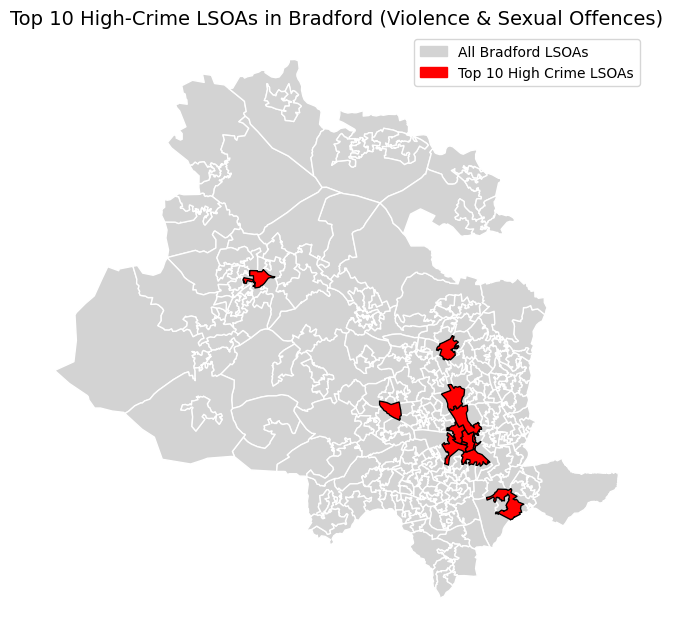

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Plot Bradford base map
bradford_shp.plot(ax=ax, color='lightgrey', edgecolor='white')

# Plot top 10 highlighted
top10_gdf.dropna(subset=['Total crimes']).plot(
    ax=ax,
    color='red',
    edgecolor='black',
    markersize=80,
    label='Top 10 High Crime LSOAs'
)

# Add title and legend
ax.set_title("Top 10 High-Crime LSOAs in Bradford (Violence & Sexual Offences)", fontsize=14)
ax.axis('off')
ax.axis('off')

import matplotlib.patches as mpatches
top10_patch = mpatches.Patch(color='red', label='Top 10 High Crime LSOAs')
all_patch = mpatches.Patch(color='lightgrey', label='All Bradford LSOAs')
plt.legend(handles=[all_patch, top10_patch], loc='upper right')

plt.show()



In [18]:
import folium

# Create folium map centered on Bradford
m = folium.Map(location=[53.795, -1.759], zoom_start=11, tiles='cartodbpositron')

# Add all Bradford boundaries (base layer)
folium.GeoJson(
    bradford_shp,
    name="Bradford LSOAs",
    style_function=lambda x: {'fillColor': '#f2f2f2', 'color': 'black', 'weight': 0.5, 'fillOpacity': 0.2}
).add_to(m)

# Add Top 10 (highlighted)
folium.GeoJson(
    top10_gdf.dropna(subset=['Total crimes']),
    name="Top 10 High-Crime LSOAs",
    style_function=lambda x: {'fillColor': 'red', 'color': 'black', 'weight': 1, 'fillOpacity': 0.6},
    tooltip=folium.GeoJsonTooltip(
        fields=['LSOA21NM', 'Total crimes'],
        aliases=['LSOA Name:', 'Total Crimes:']
    )
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save map
m.save("Bradford_Top10_HighCrime.html")
m


# Visualizations

<Figure size 800x600 with 0 Axes>

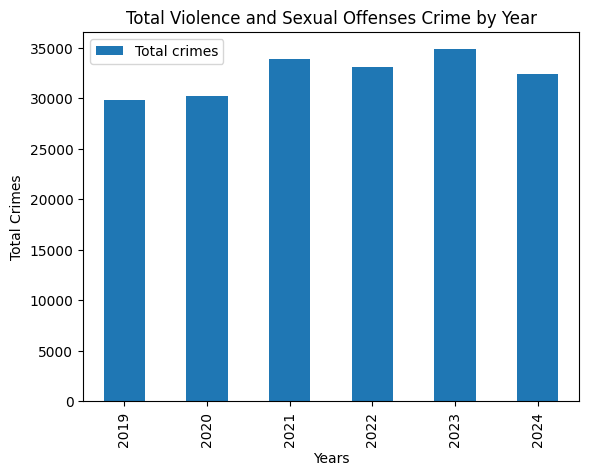

In [19]:
#Total Voilence and Sexual Offenses Crime by Year
plt.figure(figsize=(8, 6))
yearly_crime.plot(kind='bar')
plt.title('Total Violence and Sexual Offenses Crime by Year')
plt.xlabel('Years')
plt.ylabel('Total Crimes')
plt.show()



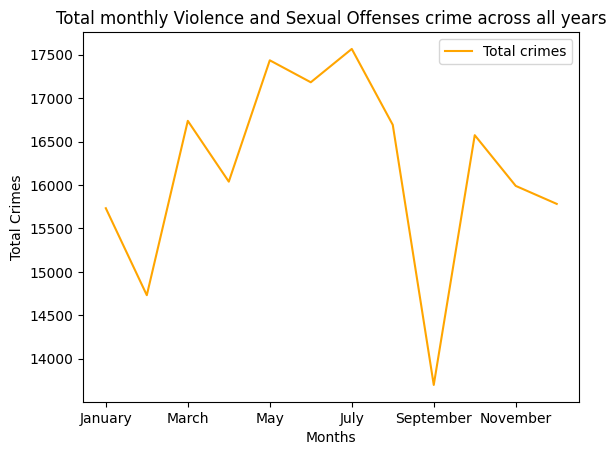

In [25]:
# total monthly crimes across all years
monthly_crimes.set_index('MonthName').plot(kind='line', color='orange')
plt.title('Total monthly Violence and Sexual Offenses crime across all years')
plt.xlabel('Months')
plt.ylabel('Total Crimes')
plt.show()

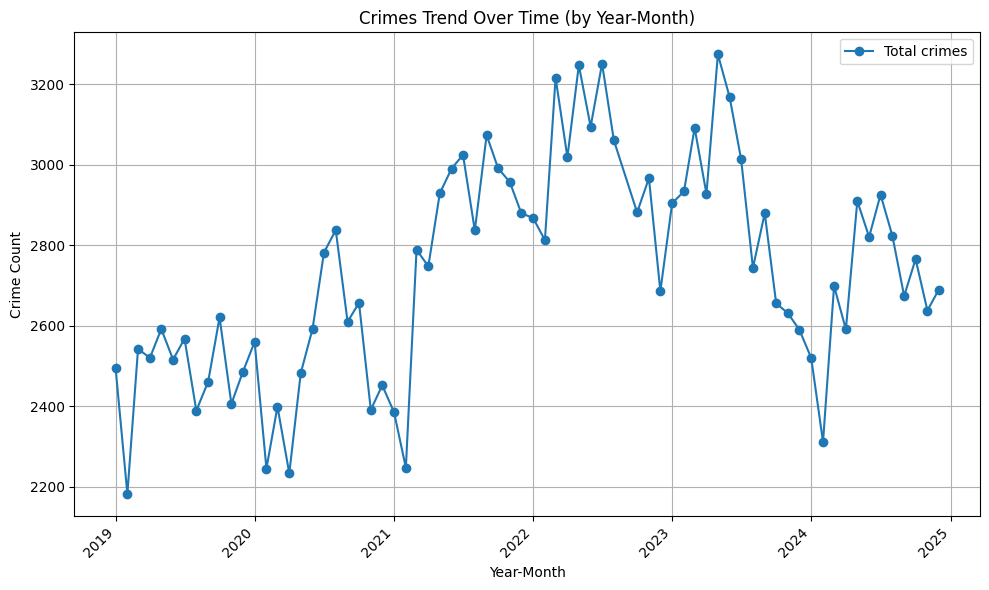

In [21]:
#total monthly crimes across each years
yearly_monthly_crimes.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Crimes Trend Over Time (by Year-Month)')
plt.xlabel('Year-Month')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/sj/b1l95gh52wv56_gvcjh__l7h0000gn/T/ipykernel_59642/4212628679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='LSOA21CD', x='Total crimes', palette='Reds_r')


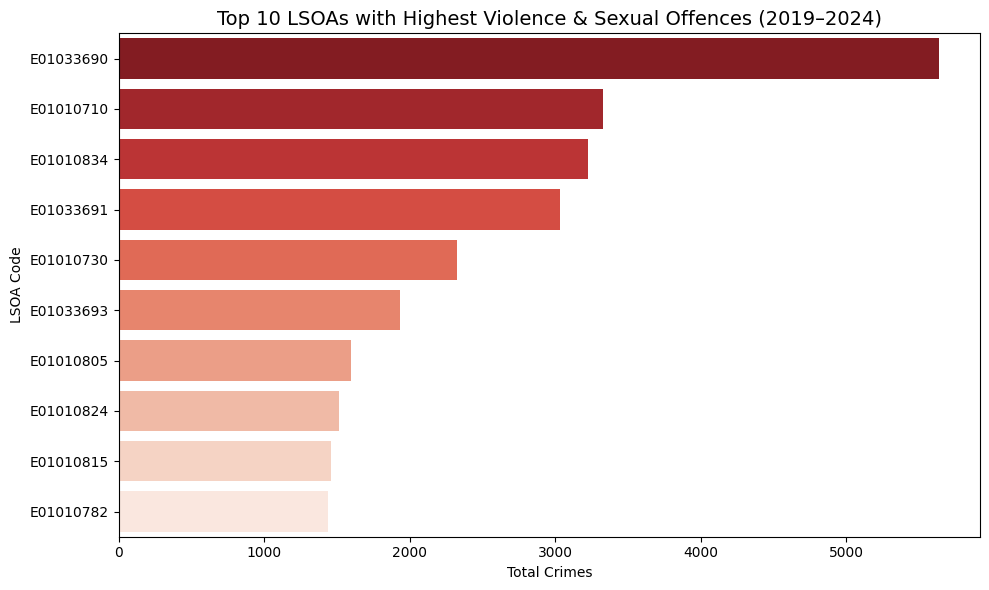

In [22]:
#Top 10 LSOA Code with high Violence and sexual offences crime accross all years 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='LSOA21CD', x='Total crimes', palette='Reds_r')
plt.title('Top 10 LSOAs with Highest Violence & Sexual Offences (2019–2024)', fontsize=14)
plt.xlabel('Total Crimes')
plt.ylabel('LSOA Code')
plt.tight_layout()
plt.show()

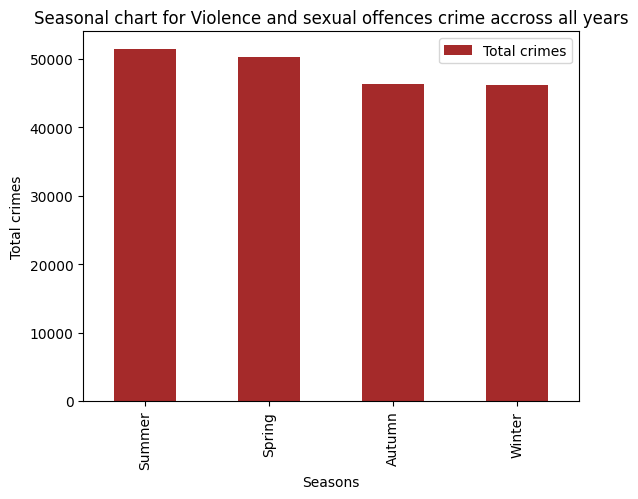

In [23]:
#Seasonal chart for Violence and sexual offences crime accross all years 
seasonal_counts.plot(kind='bar', color='brown')
plt.xlabel('Seasons')
plt.ylabel('Total crimes')
plt.title('Seasonal chart for Violence and sexual offences crime accross all years')
plt.show()

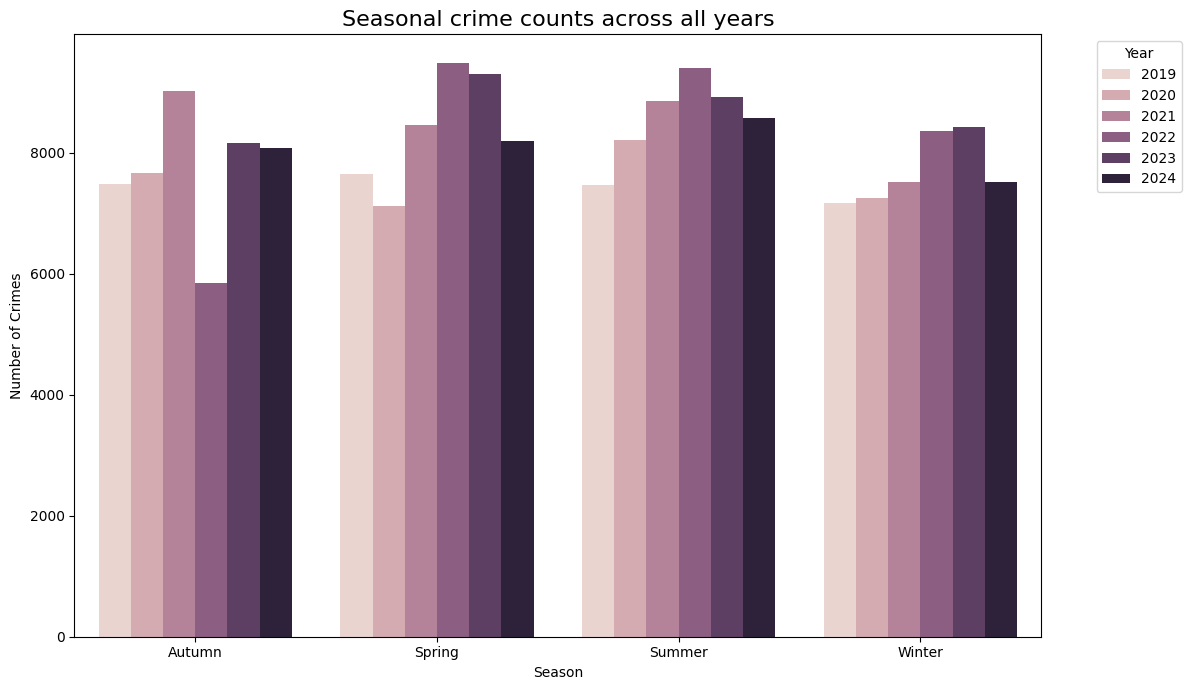

In [24]:
#Seasonal crime counts across all years
plt.figure(figsize=(12, 7))
sns.barplot(data=seasonal_crime, x='Season', y='Count', hue='Year')

plt.title("Seasonal crime counts across all years", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Number of Crimes")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()